In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

%matplotlib inline

In [57]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize the weights with random values
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward propagation through the network
        self.hidden_input = np.dot(inputs, self.weights_input_hidden)
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output)
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation and weight updates
        error = targets - self.final_output
        delta_output = error * self.sigmoid_derivative(self.final_output)

        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_output)

        # Update weights for the hidden-to-output layer
        self.weights_hidden_output += self.hidden_output.reshape(-1, 1).dot(delta_output.reshape(1, -1)) * learning_rate

        # Update weights for the input-to-hidden layer
        self.weights_input_hidden += inputs.reshape(-1, 1).dot(delta_hidden.reshape(1, -1)) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(X)):
                inputs = X[i]
                targets = np.zeros(self.output_size)
                targets[y[i]] = 1
                self.forward(inputs)
                self.backward(inputs, targets, learning_rate)

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            inputs = X[i]
            output = self.forward(inputs)
            predictions.append(np.argmax(output))
        return predictions

In [58]:
iris = load_iris()
data = iris.data
target = iris.target

In [59]:
iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df['target'] = target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [61]:
input_size = len(iris.feature_names)
hidden_size = 5 
output_size = len(np.unique(target))

In [62]:
mlp = MLP(input_size, hidden_size, output_size)
epochs = 1000
learning_rate = 0.1
mlp.train(X_train, y_train, epochs, learning_rate)

In [63]:
predictions = mlp.predict(X_test)

In [64]:
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


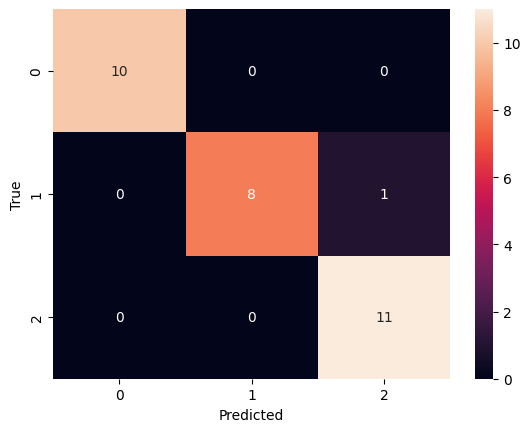

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

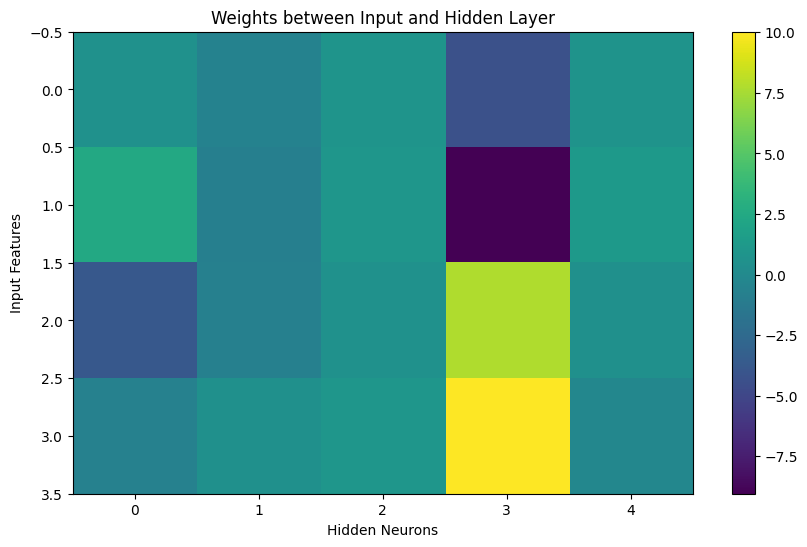

In [67]:
# Visualize the weights between input and hidden layer
plt.figure(figsize=(10, 6))
plt.imshow(mlp.weights_input_hidden, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Weights between Input and Hidden Layer')
plt.xlabel('Hidden Neurons')
plt.ylabel('Input Features')
plt.show()


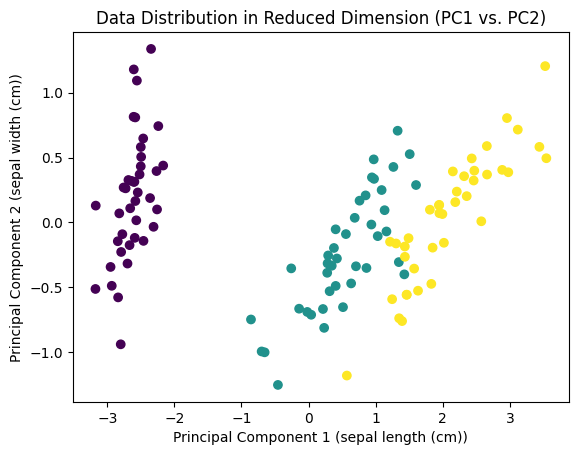

In [70]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Access the coefficients (loadings) of PC1 and PC2
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# Access the coefficients (loadings) of PC1 and PC2
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# Interpret the coefficients to understand feature contributions
feature_names = iris.feature_names

# Plot the data points with colors representing their true labels
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel(f'Principal Component 1 ({feature_names[0]})')
plt.ylabel(f'Principal Component 2 ({feature_names[1]})')
plt.title('Data Distribution in Reduced Dimension (PC1 vs. PC2)')
plt.show()